In [46]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop_health_final.csv')
print(df.shape)
df.head()

(148168, 8)


,Estimated_Insects_Count,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Currently Using,Previously Used
0,188,0,0,0.0,0,Alive,0,0
1,209,0,0,0.0,0,Damage Due To Other Causes,0,0
2,257,0,0,0.0,0,Damage Due To Other Causes,0,0
3,257,1,0,0.0,0,Damage Due To Other Causes,0,0
4,342,0,0,0.0,0,Damage Due To Other Causes,0,0


In [3]:
df['Crop_Damage'] = df['Crop_Damage'].replace({"Alive": 0, "Damage Due To Other Causes": 1, "Damage Due To Pesticides": 2})

In [4]:
df['Crop_Damage'].value_counts()

0.0    74238
1.0    12307
2.0     2313
Name: Crop_Damage, dtype: int64

### Dataset Splitting(Train, Val, Test)

In [5]:
train_df = df[~df['Crop_Damage'].isnull()]
test_df = df[df['Crop_Damage'].isnull()]
print("Shape of training dataset is {}".format(train_df.shape))
print("Shape of testing dataset is {}".format(test_df.shape))

Shape of training dataset is (88858, 8)
Shape of testing dataset is (59310, 8)


In [6]:
data = train_df.drop('Crop_Damage', axis =1)
labels = train_df['Crop_Damage']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2,
                                                  random_state = 42, stratify = labels)
x_test = test_df.drop('Crop_Damage', axis = 1)

In [9]:
print("X_train Shape: {}".format(x_train.shape))
print("X_val Shape: {}".format(x_val.shape))
print("X_test Shape: {}".format(x_test.shape))

print("y_train Shape: {}".format(y_train.shape))
print("y_val Shape: {}".format(y_val.shape))


X_train Shape: (71086, 7)
X_val Shape: (17772, 7)
X_test Shape: (59310, 7)
y_train Shape: (71086,)
y_val Shape: (17772,)


In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [11]:
x_train, y_train = smote.fit_resample(x_train, y_train)

In [12]:
print(x_train.shape)
print(y_train.shape)

(178170, 7)
(178170,)


In [13]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                Naive Bayes Algorithm" : MultinomialNB(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "                         Random Forest": RandomForestClassifier(),
    "                           AdaBoosting": AdaBoostClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "               Xtreme Gradient Boostig": XGBClassifier()
}


In [14]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")


                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                Naive Bayes Algorithm trained.
Support Vector Machine (Linear Kernel) trained.
                         Random Forest trained.
                           AdaBoosting trained.
                     Gradient Boosting trained.
               Xtreme Gradient Boostig trained.


In [16]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(x_val)
    print(
        "\n" + name + " Accuracy: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}%\n\t\t\t\t  \
        Precision-Score: {:.5f}%\n\t\t\t\t       Recall-Score: {:.5f}%"\
        .format(accuracy_score(y_val, y_pred) * 100, f1_score(y_val, y_pred, average = "weighted")*100,
               precision_score(y_val, y_pred, average = "weighted")*100, recall_score(y_val, y_pred, average = "weighted")*100)
    )

Model Performance
-----------------

                   Logistic Regression Accuracy: 52.358%
				       F1-Score: 61.64344%
				          Precision-Score: 79.69000%
				       Recall-Score: 52.35764%

                   K-Nearest Neighbors Accuracy: 65.558%
				       F1-Score: 70.46950%
				          Precision-Score: 78.11226%
				       Recall-Score: 65.55818%

                         Decision Tree Accuracy: 71.973%
				       F1-Score: 73.76358%
				          Precision-Score: 75.84604%
				       Recall-Score: 71.97277%

                Naive Bayes Algorithm Accuracy: 56.066%
				       F1-Score: 64.52213%
				          Precision-Score: 79.59179%
				       Recall-Score: 56.06572%

Support Vector Machine (Linear Kernel) Accuracy: 77.414%
				       F1-Score: 77.90180%
				          Precision-Score: 78.88863%
				       Recall-Score: 77.41391%

                         Random Forest Accuracy: 75.231%
				       F1-Score: 76.23953%
				          Precision-Score: 77.34025%
				      

### Gradient Boosting

In [17]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [18]:
gb_pred = gb_clf.predict(x_val)

In [19]:
confusion_matrix(y_val, gb_pred)

array([[11502,  2342,  1004],
       [  913,   903,   645],
       [  126,   133,   204]], dtype=int64)

In [20]:
print(classification_report(y_val, gb_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84     14848
         1.0       0.27      0.37      0.31      2461
         2.0       0.11      0.44      0.18       463

    accuracy                           0.71     17772
   macro avg       0.43      0.53      0.44     17772
weighted avg       0.81      0.71      0.75     17772



### Xtreme Gradient Boosting

In [21]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [22]:
xgb_pred = xgb_clf.predict(x_val)

In [23]:
confusion_matrix(y_val, xgb_pred)

array([[13536,  1047,   265],
       [ 1445,   764,   252],
       [  201,   181,    81]], dtype=int64)

In [24]:
print(classification_report(y_val, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     14848
         1.0       0.38      0.31      0.34      2461
         2.0       0.14      0.17      0.15       463

    accuracy                           0.81     17772
   macro avg       0.47      0.47      0.47     17772
weighted avg       0.80      0.81      0.80     17772



### Support Vector Machines

In [25]:
svm_clf = LinearSVC()
svm_clf.fit(x_train, y_train)

LinearSVC()

In [26]:
svm_pred = svm_clf.predict(x_val)

In [27]:
confusion_matrix(y_val, svm_pred)

array([[6101, 8661,   86],
       [ 263, 2185,   13],
       [  38,  423,    2]], dtype=int64)

In [28]:
print(classification_report(y_val, svm_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.41      0.57     14848
         1.0       0.19      0.89      0.32      2461
         2.0       0.02      0.00      0.01       463

    accuracy                           0.47     17772
   macro avg       0.39      0.43      0.30     17772
weighted avg       0.82      0.47      0.52     17772



### Random Forest

In [29]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
rf_pred = rf_clf.predict(x_val)

In [31]:
confusion_matrix(y_val, rf_pred)

array([[12606,  1815,   427],
       [ 1494,   742,   225],
       [  238,   174,    51]], dtype=int64)

In [32]:
print(classification_report(y_val, rf_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     14848
         1.0       0.27      0.30      0.29      2461
         2.0       0.07      0.11      0.09       463

    accuracy                           0.75     17772
   macro avg       0.41      0.42      0.41     17772
weighted avg       0.77      0.75      0.76     17772



### Logistic Regression

In [33]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

In [34]:
lr_pred = lr_clf.predict(x_val)

In [35]:
confusion_matrix(y_val, lr_pred)

array([[8383, 2729, 3736],
       [ 636,  596, 1229],
       [  65,   72,  326]], dtype=int64)

In [36]:
print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.56      0.70     14848
         1.0       0.18      0.24      0.20      2461
         2.0       0.06      0.70      0.11       463

    accuracy                           0.52     17772
   macro avg       0.39      0.50      0.34     17772
weighted avg       0.80      0.52      0.62     17772



### Ensembling

In [38]:
new_x_train = np.column_stack((gb_pred, xgb_pred, svm_pred, rf_pred, lr_pred))

In [48]:
pred_corr_df = pd.DataFrame(data = new_x_train, columns = ["gb_pred", "xgb_pred", "svm_pred",
                                                          "rf_pred", "lr_pred"])
pred_corr_df.head()

,gb_pred,xgb_pred,svm_pred,rf_pred,lr_pred
0,2.0,2.0,1.0,0.0,2.0
1,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0


<AxesSubplot: >

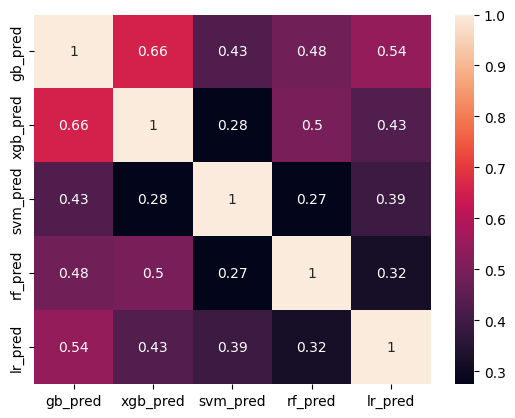

In [63]:
sns.heatmap(pred_corr_df.corr(), annot = True)

### Majority Voting Method

In [70]:
pred_corr_df['output'] = y_val.values
pred_corr_df.head()

,gb_pred,xgb_pred,svm_pred,rf_pred,lr_pred,output
0,2.0,2.0,1.0,0.0,2.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,1.0


In [92]:
a = pred_corr_df[['gb_pred', 'xgb_pred', 'svm_pred', 'rf_pred', 'lr_pred']].mode(axis = 1)

In [93]:
pred_corr_df['pred_output'] = a[0]

In [95]:
print(classification_report(pred_corr_df['output'], pred_corr_df['pred_output']))

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86     14848
         1.0       0.30      0.43      0.35      2461
         2.0       0.12      0.19      0.15       463

    accuracy                           0.76     17772
   macro avg       0.44      0.48      0.46     17772
weighted avg       0.80      0.76      0.78     17772



In [97]:
confusion_matrix(pred_corr_df['output'], pred_corr_df['pred_output'])

array([[12287,  2220,   341],
       [ 1128,  1051,   282],
       [  166,   210,    87]], dtype=int64)

### Stacking

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
             ('gb', GradientBoostingClassifier(random_state=42)),
             ('xgb', XGBClassifier(random_state=42)),
             ('lr', make_pipeline(StandardScaler(), LogisticRegression(random_state=42))),
             ('dt', DecisionTreeClassifier(random_state = 42))]

clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state = 42))

In [111]:
clf.fit(x_train, y_train).score(x_val, y_val)

0.8142583839747918

In [112]:
clf

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, g...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=42, ...))

In [113]:
stack_clf_pred = clf.predict(x_val)

In [114]:
confusion_matrix(y_val, stack_clf_pred)

array([[13918,   773,   157],
       [ 1801,   514,   146],
       [  272,   152,    39]], dtype=int64)

In [115]:
print(classification_report(y_val, stack_clf_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     14848
         1.0       0.36      0.21      0.26      2461
         2.0       0.11      0.08      0.10       463

    accuracy                           0.81     17772
   macro avg       0.45      0.41      0.42     17772
weighted avg       0.78      0.81      0.79     17772



In [117]:
clf

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, g...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=42, ...))

In [118]:
test_predictions = clf.predict(x_test)

In [124]:
from collections import Counter

In [125]:
Counter(test_predictions)

Counter({1.0: 4843, 2.0: 1201, 0.0: 53266})